In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Initialize the data list to store the data
data = []

# Read the Results.txt file in the Results folder
with open("Results/Results.txt", "r") as file:
    for line in file:
        
        # Understand the type of benchmark
        if line.startswith("-"):
            Benchmark_Type = line.split("Running OSU Benchmark ")[1].split(" ")[0]
            # Remove the parentheses at the beginning and end of the string
            Benchmark_Type = Benchmark_Type[1:-1]
        
        # Remove the leading and trailing whitespaces
        line = line.strip()
        # Skip header and separator lines
        if line.startswith("Run") or line.startswith("-"):
            continue
        # Split the line by whitespaces
        columns = line.split()
        # Checks
        if len(columns) == 5:
            Message_Size, Average_Latency, P50, P95, P99 = columns
            Min_Latency = Max_Latency = 0
            Iterations = 5000
        elif len(columns) == 8:
            Message_Size, Average_Latency, Min_Latency, Max_Latency, Iterations, P50, P95, P99 = columns
        else:
            continue
        
        # Convert the data to float
        Message_Size = int(Message_Size)
        Average_Latency = float(Average_Latency)
        Min_Latency = float(Min_Latency)
        Max_Latency = float(Max_Latency)
        Iterations = int(Iterations)
        P50 = float(P50)
        P95 = float(P95)
        P99 = float(P99)
        # Append the data to the list
        data.append([Message_Size, Average_Latency, Min_Latency, Max_Latency, Iterations, P50, P95, P99, Benchmark_Type])
        
# Convert the data list to a pandas DataFrame
df = pd.DataFrame(data, columns=["Message_Size", "Average_Latency", "Min_Latency", "Max_Latency", "Iterations", "P50", "P95", "P99", "Benchmark_Type"])

# Print the first 5 rows of the DataFrame
print(df.head())

# Print the last 5 rows of the DataFrame
print(df.tail())

   Message_Size  Average_Latency  Min_Latency  Max_Latency  Iterations  \
0             1          1545.35          0.0          0.0        5000   
1             2          1603.67          0.0          0.0        5000   
2             4          1584.32          0.0          0.0        5000   
3             8          1590.92          0.0          0.0        5000   
4            16          1650.32          0.0          0.0        5000   

       P50      P95       P99    Benchmark_Type  
0  1184.00  5035.42  14024.59  latency-one-node  
1  1188.05  5251.58  14483.24  latency-one-node  
2  1183.44  5134.18  14931.27  latency-one-node  
3  1181.62  5170.19  15055.75  latency-one-node  
4  1179.53  5290.09  15232.28  latency-one-node  
    Message_Size  Average_Latency  Min_Latency  Max_Latency  Iterations  \
81         32768          1413.91        62.68      2725.13        5000   
82         65536          1444.00       106.54      2721.46        5000   
83        131072          1455

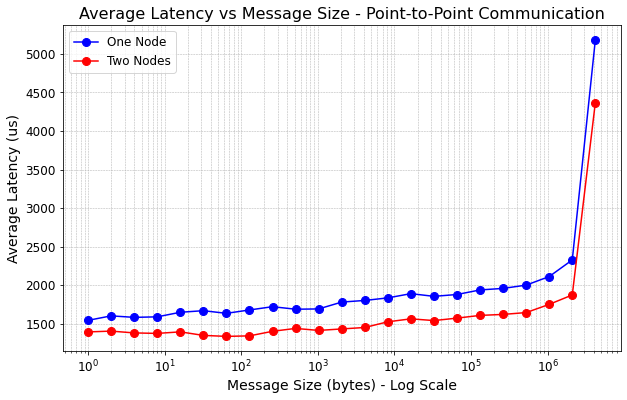

In [5]:
# Plot the Average Latency vs Message Size for the latency-one-node and latency-two-nodes benchmarks
df_latency_one_node = df[df["Benchmark_Type"] == "latency-one-node"]
df_latency_two_nodes = df[df["Benchmark_Type"] == "latency-two-nodes"]
plt.figure(figsize=(10, 6))
plt.plot(df_latency_one_node["Message_Size"], df_latency_one_node["Average_Latency"], markersize=8, marker="o", color="blue", label="One Node")
plt.plot(df_latency_two_nodes["Message_Size"], df_latency_two_nodes["Average_Latency"], markersize=8, marker="o", color="red", label="Two Nodes")
plt.xlabel("Message Size (bytes) - Log Scale", fontsize=14)
plt.ylabel("Average Latency (us)", fontsize=14)
plt.title("Average Latency vs Message Size - Point-to-Point Communication", fontsize=16)
plt.grid(True, which="both", ls="--", lw=0.5)
plt.xscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

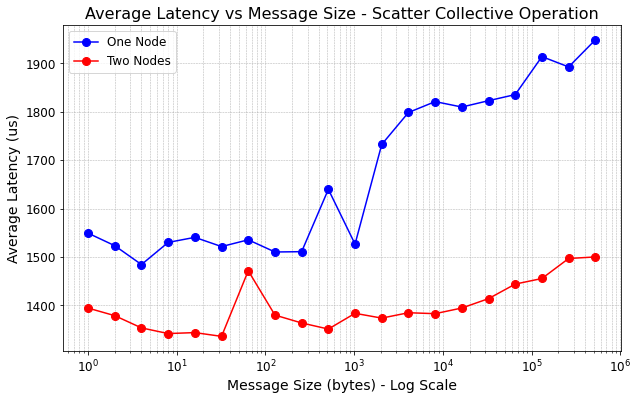

In [6]:
# Plot the Average Latency vs Message Size for the scatter-one-node and scatter-two-nodes benchmarks
df_scatter_one_node = df[df["Benchmark_Type"] == "scatter-one-node"]
df_scatter_two_nodes = df[df["Benchmark_Type"] == "scatter-two-nodes"]
plt.figure(figsize=(10, 6))
plt.plot(df_scatter_one_node["Message_Size"], df_scatter_one_node["Average_Latency"], markersize=8, marker="o", color="blue", label="One Node")
plt.plot(df_scatter_two_nodes["Message_Size"], df_scatter_two_nodes["Average_Latency"], markersize=8, marker="o", color="red", label="Two Nodes")
plt.xlabel("Message Size (bytes) - Log Scale", fontsize=14)
plt.ylabel("Average Latency (us)", fontsize=14)
plt.title("Average Latency vs Message Size - Scatter Collective Operation", fontsize=16)
plt.grid(True, which="both", ls="--", lw=0.5)
plt.xscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()